* Importing the necessary libs :

In [2]:
# Imports :

import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import time

* Dowloanding the MNIST dataset :

In [3]:

mnist = fetch_openml('mnist_784', as_frame=False)

#randomise Data et target
indices = np.random.randint(10000, size=10000)
data = mnist.data[indices]
target = mnist.target[indices]

# training set of 49000 (70% training set - 30 % test set)
xtrain, xtest, ytrain, ytest =train_test_split(data, target, train_size=int(len(data)*0.7))

* Kernel variation :

In [4]:
ScoreResult = []
PrecisionResult = []
RecallResult = []
LossResult = []
TimeTrainingRes = []
TimePredictionRes = []

def kernalvar(ker):
    #Training :
    clf = SVC(kernel = ker)
    start1 = time.time()
    clf.fit(xtrain, ytrain)
    end1 = time.time()

    #Prediction :
    start2 = time.time()
    prediction = clf.predict(xtest)
    end2 = time.time()

    #Metrics :
    score = clf.score(xtest, ytest)
    recall = metrics.recall_score(ytest, prediction, average ='macro')
    precision = metrics.precision_score(ytest, prediction, average ='macro')
    loss0_1 = metrics.zero_one_loss(ytest, prediction)

    trainingTime = end1 - start1
    predictionTime = end2 - start2

    #Storing the results :
    ScoreResult.append(score * 100)
    PrecisionResult.append(precision * 100)
    RecallResult.append(recall * 100)
    LossResult.append(loss0_1)
    TimeTrainingRes.append(trainingTime)
    TimePredictionRes.append(predictionTime)

    #Prints :
    print("This SVC model with a kernel", ker, " has a score = ", score*100, "%.")
    print("4 th image ::: prediction = ", prediction[3], "reel = ", ytest[3])
    print("Precision = ", precision * 100)
    print("Recall = ", recall * 100)
    print("Zero-One-Loss = ", loss0_1 * 100)
    print("Training time ... = ", TimeTrainingRes)
    print("Prediction time ... = ", TimePredictionRes)

In [6]:
kernel = ('linear', 'poly', 'rbf', 'sigmoid')
for ker in kernel:
    kernalvar(ker)
    print("----------------------------------------------------------------------------------------------------")

This SVC model with a kernel linear  has a score =  95.56666666666666 %.
4 th image ::: prediction =  6 reel =  6
Precision =  95.61090341814553
Recall =  95.49138649720967
Zero-One-Loss =  4.433333333333334
Training time ... =  [34.9690055847168, 25.320002794265747, 19.807546854019165, 20.76900053024292, 11.461133241653442]
Prediction time ... =  [10.555996894836426, 6.994998216629028, 19.45299792289734, 13.005003213882446, 10.247057676315308]
----------------------------------------------------------------------------------------------------
This SVC model with a kernel poly  has a score =  96.83333333333334 %.
4 th image ::: prediction =  6 reel =  6
Precision =  96.9343949211909
Recall =  96.8325394780864
Zero-One-Loss =  3.166666666666662
Training time ... =  [34.9690055847168, 25.320002794265747, 19.807546854019165, 20.76900053024292, 11.461133241653442, 22.40113663673401]
Prediction time ... =  [10.555996894836426, 6.994998216629028, 19.45299792289734, 13.005003213882446, 10.247

* Showing this results :

In [7]:
print(ScoreResult)
print("\n")
print(PrecisionResult)
print("\n")
print(RecallResult) 
print("\n")
print(LossResult)

[95.56666666666666, 96.83333333333334, 97.56666666666666, 83.7, 95.56666666666666, 96.83333333333334, 97.56666666666666, 83.7]


[95.61090341814553, 96.9343949211909, 97.58228124087927, 83.3936656318714, 95.61090341814553, 96.9343949211909, 97.58228124087927, 83.3936656318714]


[95.49138649720967, 96.8325394780864, 97.55102099393457, 83.23044689397001, 95.49138649720967, 96.8325394780864, 97.55102099393457, 83.23044689397001]


[0.044333333333333336, 0.03166666666666662, 0.024333333333333318, 0.16300000000000003, 0.044333333333333336, 0.03166666666666662, 0.024333333333333318, 0.16300000000000003]


* Visualizing the results :

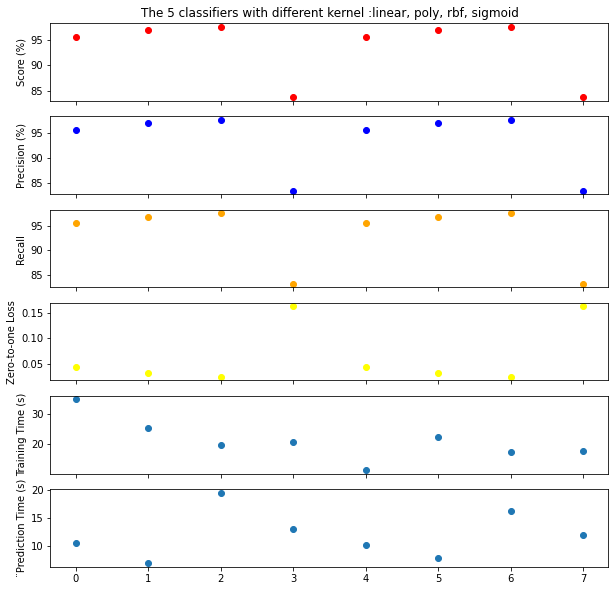

In [13]:
fig, axarr = plt.subplots(6, sharex=True, figsize=(10,10))
axarr[0].scatter(range(8), ScoreResult, c='red')
axarr[0].set_title('The 5 classifiers with different kernel :linear, poly, rbf, sigmoid')
axarr[0].set_ylabel('Score (%)')
axarr[1].scatter(range(8), PrecisionResult, c='blue')
axarr[1].set_ylabel('Precision (%)')
axarr[2].scatter(range(8), RecallResult, c='orange')
axarr[2].set_ylabel('Recall ')
axarr[3].scatter(range(8), LossResult, c='yellow')
axarr[3].set_ylabel('Zero-to-one Loss')
axarr[4].scatter(range(8), TimeTrainingRes)
axarr[4].set_ylabel('Training Time (s)')
axarr[5].scatter(range(8), TimePredictionRes)
axarr[5].set_ylabel('¨Prediction Time (s)')

plt.show()

* Variation of C (Tolérance aux erreurs) :


In [16]:
ScoreResult1 =[]
PrecisionResult1 = []
RecallResult1 = []
LossResult1 = []
TrainingTimeResult1 = []
PredictionTimeResult1 = []

def costVar(c) :

    # Training :
    clf = SVC(kernel='poly', C=c)
    start1 =time.time()
    clf.fit(xtrain, ytrain)
    end1 = time.time()

    # Prediction :
    start2= time.time()
    predict = clf.predict(xtest)
    end2 = time.time()

    # Metrics :
    score = clf.score(xtest,ytest)
    recall = metrics.recall_score(ytest, predict, average ='macro')
    precision = metrics.precision_score(ytest, predict,  average='macro')
    loss0_1 = metrics.zero_one_loss(ytest, predict)
    trainingTime = end1 - start1
    predictionTime = end2 - start2

    #Stroing the results :
    ScoreResult1.append(score*100)
    PrecisionResult1.append(precision*100)
    RecallResult1.append(recall)
    LossResult1.append(loss0_1)
    PredictionTimeResult1.append(predictionTime)
    TrainingTimeResult1.append(trainingTime)
    print("This SVC model, kernel rbf and with a cost of = ", c, ", a score of = ", score*100, "%.")
    print("4th image ::: prediction = ", predict[3], "reel = ", ytest[3])
    print ("precision ::", precision*100)
    print ("recall  :: ", recall*100)
    print ("zero-one_loss :: ", loss0_1*100)
    print( "training time :: ", trainingTime)
    print( "prediction time :: ", predictionTime)
   
    



In [36]:
costs = np.linspace(0.1,1, 5, endpoint=True)
for c in costs:
    costVar(c)
    print("----------------------------------------------------------------------------------------------")

This SVC model, kernel rbf and with a cost of =  0.1 , a score of =  90.63333333333333 %.
4th image ::: prediction =  6 reel =  6
precision :: 91.58572614717221
recall  ::  90.63980167055472
zero-one_loss ::  9.366666666666667
training time ::  42.65169858932495
prediction time ::  11.884791374206543
----------------------------------------------------------------------------------------------
This SVC model, kernel rbf and with a cost of =  0.325 , a score of =  95.26666666666667 %.
4th image ::: prediction =  6 reel =  6
precision :: 95.42264571509247
recall  ::  95.23814781658052
zero-one_loss ::  4.733333333333334
training time ::  37.89634680747986
prediction time ::  12.444847583770752
----------------------------------------------------------------------------------------------
This SVC model, kernel rbf and with a cost of =  0.55 , a score of =  96.3 %.
4th image ::: prediction =  6 reel =  6
precision :: 96.42674218703837
recall  ::  96.30423633143967
zero-one_loss ::  3.70000

In [38]:
print(ScoreResult1)
print("\n")  
print(PrecisionResult1)
print("\n")  
print(RecallResult1)
print("\n")  
print(LossResult1)
print("\n")  
print(TrainingTimeResult1)
print("\n")  
print(PredictionTimeResult1)

print(len(ScoreResult1))

[10.766666666666666, 10.766666666666666, 11.333333333333332, 44.7, 83.3, 94.63333333333334, 97.5, 97.53333333333333, 97.56666666666666, 97.56666666666666, 10.766666666666666, 14.366666666666667, 90.63333333333333, 97.53333333333333, 97.56666666666666, 10.766666666666666, 10.766666666666666, 11.333333333333332, 44.7, 83.3, 94.63333333333334, 97.5, 97.53333333333333, 97.56666666666666, 97.56666666666666, 90.63333333333333, 95.26666666666667, 96.3, 96.43333333333334, 96.83333333333334]


[1.0766666666666667, 1.0766666666666667, 11.0828025477707, 78.83042096667211, 87.7338300643855, 94.80903484306454, 97.5657761831328, 97.56424532849002, 97.6053139766835, 97.6053139766835, 1.0766666666666667, 28.51863715783343, 91.58572614717221, 97.5757607306558, 97.6053139766835, 1.0766666666666667, 1.0766666666666667, 11.0828025477707, 78.83042096667211, 87.7338300643855, 94.80903484306454, 97.5657761831328, 97.56424532849002, 97.6053139766835, 97.6053139766835, 91.58572614717221, 95.42264571509247, 96.

* Visualizing the results :

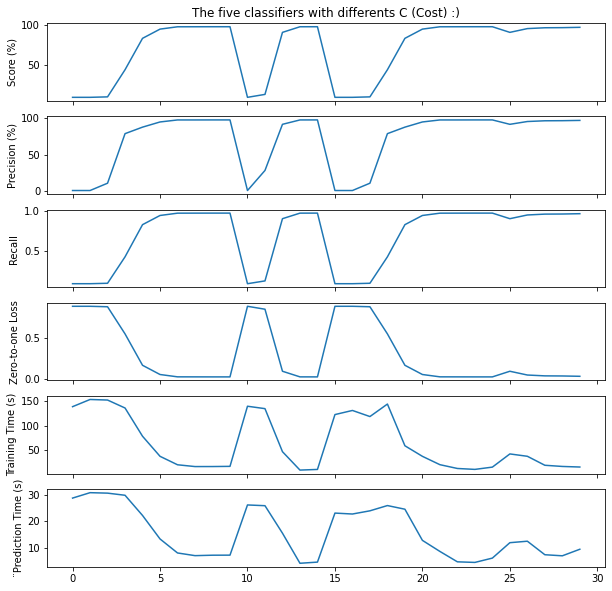

In [39]:
fig, axarr = plt.subplots(6, sharex=True, figsize=(10,10))
axarr[0].plot(range(30), ScoreResult1)
axarr[0].set_title('The five classifiers with differents C (Cost) :)')
axarr[0].set_ylabel('Score (%)')
axarr[1].plot(range(30), PrecisionResult1)
axarr[1].set_ylabel('Precision (%)')
axarr[2].plot(range(30), RecallResult1)
axarr[2].set_ylabel('Recall ')
axarr[3].plot(range(30), LossResult1)
axarr[3].set_ylabel('Zero-to-one Loss')
axarr[4].plot(range(30), TrainingTimeResult1)
axarr[4].set_ylabel('Training Time (s)')
axarr[5].plot(range(30), PredictionTimeResult1)
axarr[5].set_ylabel('¨Prediction Time (s)')

plt.show()

*  Confusion Matrix :

In [40]:
from sklearn.metrics import confusion_matrix

In [42]:
clf = SVC(kernel='linear')

begin = time.time()
clf.fit(xtrain,ytrain)
predicted = clf.predict(X=xtest)
end = time.time()

print("score: ", clf.score(xtest, ytest))

total_time = end - begin
print("time: ", total_time)

print(confusion_matrix(ytest,predicted))

score:  0.9556666666666667
time:  18.43527603149414
[[313   0   0   0   0   0   0   0   0   0]
 [  0 319   1   1   2   0   0   0   0   0]
 [  0   2 283   3   2   0   2   2   4   0]
 [  2   1   7 281   0   2   0   3   1   2]
 [  0   0   1   0 284   0   0   0   0   4]
 [  2   0   1   7   0 229   2   0   1   1]
 [  3   0   1   0   0   1 314   0   0   0]
 [  0   2   5   1   2   0   0 301   0   6]
 [  0   9   5  10   0   2   0   1 272   3]
 [  1   1   4   3   8   0   0   8   1 271]]


* data variation vs confusion matrix :

In [43]:
Score =[]
Precision = []
Recall = []
Loss = []
TimeTraining = []
TimePrediction = []

for i in (10000,20000,30000,40000,50000):
    
    #randomise Data & target
    indices = np.random.randint(i, size=i)
    data = mnist.data[indices]
    target = mnist.target[indices]
   
    # (70% training set - 30 % test set)
    xtrain, xtest, ytrain, ytest =train_test_split(data, target, train_size=int(len(data)*0.7))

    # TRAINING
    clf = SVC(kernel='linear', C=0.0001, gamma=0.0001)
    startTrain =time.time()
    clf.fit(xtrain, ytrain)
    endTrain = time.time()

    # PREDICTION
    startpred= time.time()
    predict = clf.predict(xtest)
    endpred = time.time()

    # METRICS
    score = clf.score(xtest,ytest)
    recall = metrics.recall_score(ytest, predict, average ='macro')
    precision = metrics.precision_score(ytest, predict,  average='macro')
    loss01 = metrics.zero_one_loss(ytest, predict)
    cm = metrics.confusion_matrix(ytest, predict)
    timetrain = endTrain - startTrain
    timePred = endpred - startpred
    
    #Storing results
    Score.append(score*100)
    Precision.append(precision*100)
    Recall.append(recall)
    Loss.append(loss01)
    TimePrediction.append(timePred)
    TimeTraining.append(timetrain)

    #Prints
    print("This SVC model has a score = ", score*100, "%.")
    print("4th image ::: prediction = ",predict[3], "reel = ", ytest[3])
    print ("precision =>", precision*100)
    print ("recall  =>",recall*100)
    print ("zero-one_loss =>",recall*100)
    print( "training time =>", timetrain)
    print( "prediction time =>", timePred)
    print("confusion matrix :: \n")
    print(cm)
    print("\n")
  

This SVC model has a score =  95.76666666666667 %.
4th image ::: prediction =  4 reel =  4
precision => 95.74806992594824
recall  => 95.70957132908696
zero-one_loss => 95.70957132908696
training time => 11.42409873008728
prediction time => 5.375808000564575
confusion matrix :: 

[[281   0   3   0   1   2   1   0   0   0]
 [  0 350   2   1   0   0   0   0   0   0]
 [  5   1 264   3   0   0   3   2   0   0]
 [  0   1   4 288   1   2   0   0   0   0]
 [  1   0   1   0 287   0   0   0   0   5]
 [  4   0   1   5   0 252   0   0   1   0]
 [  3   1   3   2   3   2 297   0   2   0]
 [  0   0   2   0   6   1   0 310   1   0]
 [  0   3   2   3   0   8   4   0 270   1]
 [  1   3   0   8  10   0   0   8   0 274]]
This SVC model has a score =  95.86666666666666 %.
4th image ::: prediction =  8 reel =  8
precision => 95.82843444159714
recall  => 95.80015947519556
zero-one_loss => 95.80015947519556
training time => 42.41517424583435
prediction time => 21.022829294204712
confusion matrix :: 

[[570   